<a href="https://colab.research.google.com/github/Bharatgaur/RawProjects/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

<ipython-input-1-f27a1d36e8b5>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [5]:
import os
import zipfile

# Set up directory paths
dataset_name = 'farhanmd29/50-startups'
download_dir = 'datasets/'
dataset_zip = download_dir + '50-startups.zip'

# Ensure the directory exists
os.makedirs(download_dir, exist_ok=True)

# Download the dataset from Kaggle
os.system(f'kaggle datasets download -d {dataset_name} -p {download_dir}')

# Unzip the dataset
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(download_dir)

# Load the dataset (adjust the file name as needed)
csv_file = download_dir + '50_Startups.csv'
dataset = pd.read_csv(csv_file)

# Display the first few rows of the dataset
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [7]:
len(dataset)

50

In [8]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
dataset.shape

(50, 5)

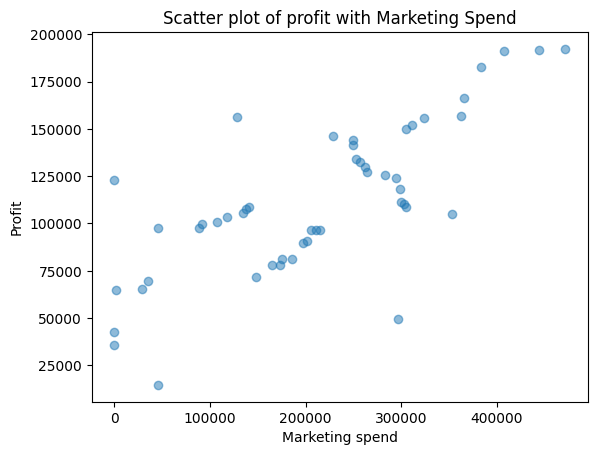

In [11]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with Marketing Spend')
plt.xlabel('Marketing spend')
plt.ylabel('Profit')
plt.show()

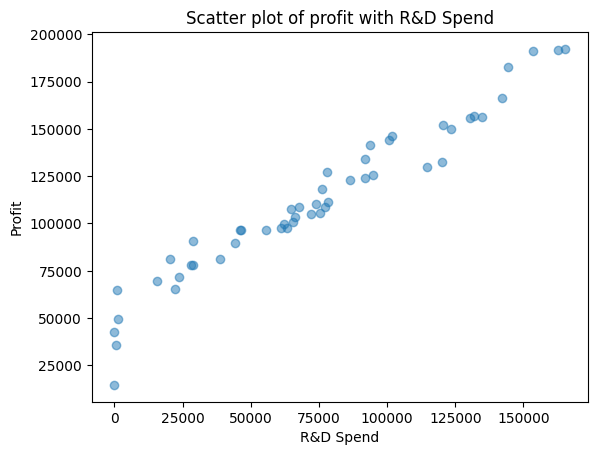

In [12]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

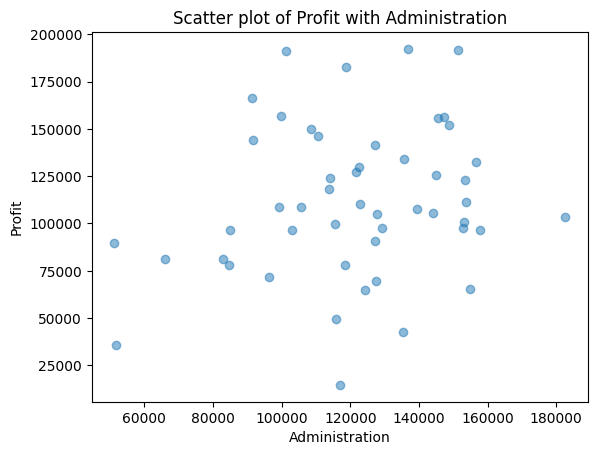

In [13]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

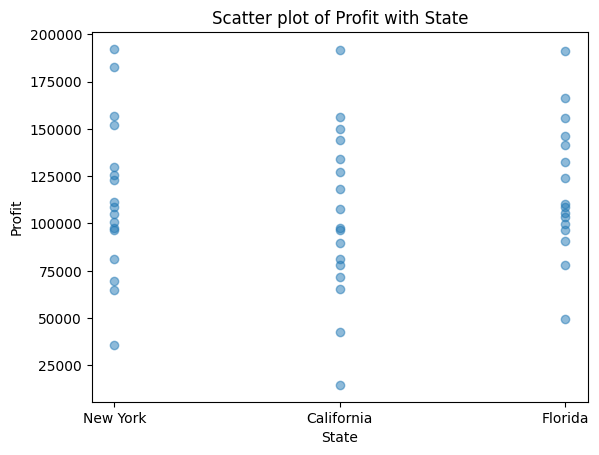

In [14]:
plt.scatter(dataset['State'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

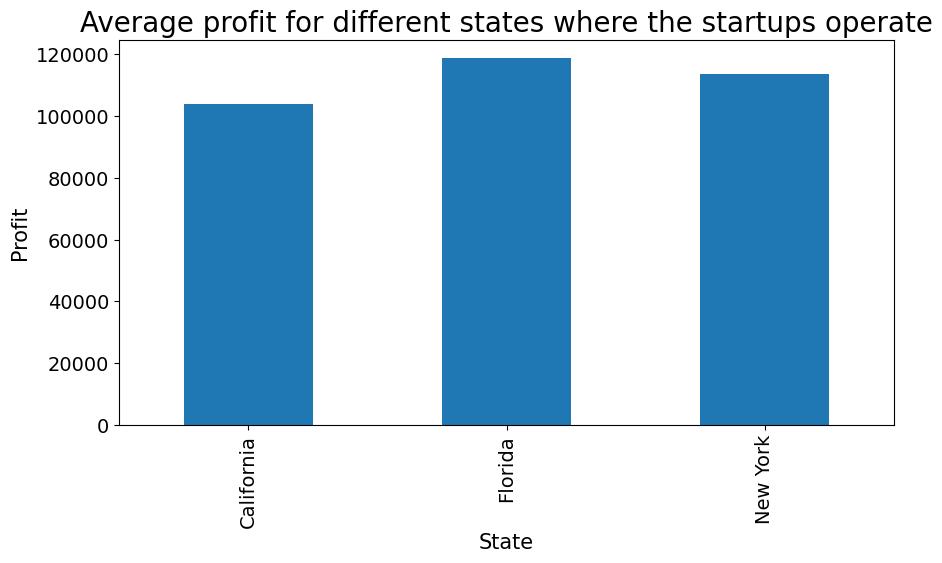

In [15]:
# Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [16]:
dataset.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [17]:
# Create dummy variables for the categeorical variable state
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the orginal column state from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [18]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [19]:
dependent_variable = 'Profit'

In [20]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist())-{dependent_variable})
independent_variables

['Marketing Spend',
 'R&D Spend',
 'Florida_State',
 'NewYork_State',
 'Administration',
 'California_State']

In [21]:
# Create the data of independent variables
x = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [22]:
x

array([[4.7178410e+05, 1.6534920e+05, 0.0000000e+00, 1.0000000e+00,
        1.3689780e+05, 0.0000000e+00],
       [4.4389853e+05, 1.6259770e+05, 0.0000000e+00, 0.0000000e+00,
        1.5137759e+05, 1.0000000e+00],
       [4.0793454e+05, 1.5344151e+05, 1.0000000e+00, 0.0000000e+00,
        1.0114555e+05, 0.0000000e+00],
       [3.8319962e+05, 1.4437241e+05, 0.0000000e+00, 1.0000000e+00,
        1.1867185e+05, 0.0000000e+00],
       [3.6616842e+05, 1.4210734e+05, 1.0000000e+00, 0.0000000e+00,
        9.1391770e+04, 0.0000000e+00],
       [3.6286136e+05, 1.3187690e+05, 0.0000000e+00, 1.0000000e+00,
        9.9814710e+04, 0.0000000e+00],
       [1.2771682e+05, 1.3461546e+05, 0.0000000e+00, 0.0000000e+00,
        1.4719887e+05, 1.0000000e+00],
       [3.2387668e+05, 1.3029813e+05, 1.0000000e+00, 0.0000000e+00,
        1.4553006e+05, 0.0000000e+00],
       [3.1161329e+05, 1.2054252e+05, 0.0000000e+00, 1.0000000e+00,
        1.4871895e+05, 0.0000000e+00],
       [3.0498162e+05, 1.2333488e+05,

In [23]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [27]:
dataset[independent_variables]

,Marketing Spend,R&D Spend,Florida_State,NewYork_State,Administration,California_State
0,471784.10,165349.20,0,1,136897.80,0
1,443898.53,162597.70,0,0,151377.59,1
2,407934.54,153441.51,1,0,101145.55,0
3,383199.62,144372.41,0,1,118671.85,0
4,366168.42,142107.34,1,0,91391.77,0
5,362861.36,131876.90,0,1,99814.71,0
6,127716.82,134615.46,0,0,147198.87,1
7,323876.68,130298.13,1,0,145530.06,0
8,311613.29,120542.52,0,1,148718.95,0
9,304981.62,123334.88,0,0,108679.17,1


In [28]:
dataset[dependent_variable]

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [29]:
# splitting the dataset into the training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state= 0)

In [30]:
X_train[0:10]

array([[2.1463481e+05, 5.5493950e+04, 1.0000000e+00, 0.0000000e+00,
        1.0305749e+05, 0.0000000e+00],
       [2.0551764e+05, 4.6014020e+04, 0.0000000e+00, 1.0000000e+00,
        8.5047440e+04, 0.0000000e+00],
       [1.3405007e+05, 7.5328870e+04, 1.0000000e+00, 0.0000000e+00,
        1.4413598e+05, 0.0000000e+00],
       [2.1079767e+05, 4.6426070e+04, 0.0000000e+00, 0.0000000e+00,
        1.5769392e+05, 1.0000000e+00],
       [2.9491957e+05, 9.1749160e+04, 1.0000000e+00, 0.0000000e+00,
        1.1417579e+05, 0.0000000e+00],
       [3.2387668e+05, 1.3029813e+05, 1.0000000e+00, 0.0000000e+00,
        1.4553006e+05, 0.0000000e+00],
       [2.5651292e+05, 1.1994324e+05, 1.0000000e+00, 0.0000000e+00,
        1.5654742e+05, 0.0000000e+00],
       [1.9039300e+03, 1.0002300e+03, 0.0000000e+00, 1.0000000e+00,
        1.2415304e+05, 0.0000000e+00],
       [0.0000000e+00, 5.4205000e+02, 0.0000000e+00, 1.0000000e+00,
        5.1743150e+04, 0.0000000e+00],
       [1.0713838e+05, 6.5605480e+04,

In [31]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train[0:10]

array([[0.45494286, 0.33561668, 1.        , 0.        , 0.48655174,
        0.        ],
       [0.43561799, 0.2782839 , 0.        , 1.        , 0.3173015 ,
        0.        ],
       [0.28413435, 0.45557444, 1.        , 0.        , 0.87258866,
        0.        ],
       [0.44680961, 0.2807759 , 0.        , 0.        , 1.        ,
        1.        ],
       [0.62511553, 0.55488118, 1.        , 0.        , 0.59103645,
        0.        ],
       [0.68649342, 0.7880179 , 1.        , 0.        , 0.88568959,
        0.        ],
       [0.54370828, 0.72539353, 1.        , 0.        , 0.98922572,
        0.        ],
       [0.0040356 , 0.0060492 , 0.        , 1.        , 0.6847981 ,
        0.        ],
       [0.        , 0.00327821, 0.        , 1.        , 0.00432296,
        0.        ],
       [0.22709197, 0.39676926, 0.        , 1.        , 0.95618996,
        0.        ]])

In [33]:
# Fitting Multiple Liner Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [34]:
regressor.intercept_

44153.95466784859

In [35]:
regressor.coef_

array([ 1.72720281e+04,  1.27892182e+05, -8.72645791e+02,  7.86007422e+02,
        3.49927567e+03,  8.66383692e+01])

In [36]:
Y_pred_train = regressor.predict(X_train)

In [37]:
Y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [38]:
Y_pred = regressor.predict(X_test)

In [40]:
# predicted profit on the test data
Y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [41]:
# Actual profit on the test data
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [42]:
mean_squared_error(Y_test, Y_pred)

83502864.03257729

In [43]:
# Train performance
math.sqrt(mean_squared_error(Y_train, Y_pred_train))

9031.666612578969

In [44]:
# Test performance
math.sqrt(mean_squared_error(Y_test, Y_pred))

9137.99015279494

In [45]:
r2_score(Y_train, Y_pred_train)

0.9501847627493607

In [46]:
r2_score(Y_test, Y_pred)

0.9347068473282425